In [1]:
# load packages and functions
suppressMessages(library(data.table))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(ggpointdensity))
suppressMessages(library(ggrepel))
suppressMessages(library(ggsci))
suppressMessages(library(ggthemes))
suppressMessages(library(magrittr))
suppressMessages(library(patchwork))
suppressMessages(library(RColorBrewer))
suppressMessages(library(stringr))
suppressMessages(library(tidyverse))
suppressMessages(library(viridis))
suppressMessages(library(ComplexHeatmap))

n_min=10000
frac=0.90

cluster_df = read.table("/projects/jinamo@xsede.org/cytof/data/cluster_annotation.txt",sep="\t",header=TRUE) %>%
    dplyr::mutate(cluster = as.character(cluster))


col_df = data.frame(cluster = 0:30,
                    color = c("#E41A1C",
                              "#377EB8",
                              "#4DAF4A",
                              "#984EA3",
                              "#FF7F00",
                              "#FFFF33",
                              "#A65628",
                              "lightgrey",
                              "#999999",
                              "#66C2A5",
                              "#67000D",
                              "#8DA0CB",
                              "#FFD92F",
                              "#A6D854",
                              "#E78AC3",
                              "#FC8D62",
                              "darkgrey",
                              "#FEB24C",
                              "#377EB8",
                              "lightblue",
                              "#FDE0EF",
                              "#B8E186",
                              "#66C2A5",
                              "#A6D855",
                              "#E78AC4",
                              "#FC8D63",
                              "brown",
                              "#FEB25C",
                              "#377EB9",
                              "lightgreen",
                              "#FDE1EF"))


In [2]:


for (CELL in c("B_cells","NK_cells","T_cells","myeloid")){
  # parameter for UMAP
  if (CELL == "B_cells"){  
    prop = 1
    n_neighbors=30
    min_dist=0.01
    resolution_list=0.5
  } else if (CELL == "T_cells"){  
    prop = 0.1
    n_neighbors=30
    min_dist=0.01
    resolution_list=0.7
  } else if (CELL == "NK_cells"){  
    prop = 1
    n_neighbors=30
    min_dist=0.01
    resolution_list=0.3
  } else if (CELL == "myeloid"){    
    prop = 0.1
    n_neighbors=30
    min_dist=0.01
    resolution_list=0.3
  }
  
  if (CELL == "B_cells"){
    tryCatch({
    masc = readRDS(file = paste0("/projects/jinamo@xsede.org/cytof/data/",CELL,"/MASC_Control_RAV0_Prop",prop,"_Nmin",n_min,"_topVar",frac,"_nneighbors",n_neighbors,"_mindist",min_dist,"_res",resolution_list,".rds")) %>%
      magrittr::set_colnames(c("cluster","size","model.pvalue","OR","CIlower","CIupper")) %>%
      dplyr::mutate(comp="RA",
                    cell = CELL)
    }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")}) 
  } else {
    tryCatch({
    masc = rbind(masc,
                 readRDS(file = paste0("/projects/jinamo@xsede.org/cytof/data/",CELL,"/MASC_Control_RAV0_Prop",prop,"_Nmin",n_min,"_topVar",frac,"_nneighbors",n_neighbors,"_mindist",min_dist,"_res",resolution_list,".rds")) %>%
                   magrittr::set_colnames(c("cluster","size","model.pvalue","OR","CIlower","CIupper")) %>%
                   dplyr::mutate(comp="RA",
                    cell = CELL)
    )
    }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")}) 
  }
  
  tryCatch({
  masc = rbind(masc,
               readRDS(file = paste0("/projects/jinamo@xsede.org/cytof/data/",CELL,"/MASC_Control_CCPpRA_Prop",prop,"_Nmin",n_min,"_topVar",frac,"_nneighbors",n_neighbors,"_mindist",min_dist,"_res",resolution_list,".rds")) %>%
                 magrittr::set_colnames(c("cluster","size","model.pvalue","OR","CIlower","CIupper")) %>%
                 dplyr::mutate(comp="RA [CCP(+)]",
                    cell = CELL)
  )
  }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")})   
    
  tryCatch({  
  masc = rbind(masc,
               readRDS(file = paste0("/projects/jinamo@xsede.org/cytof/data/",CELL,"/MASC_Control_CCPnRA_Prop",prop,"_Nmin",n_min,"_topVar",frac,"_nneighbors",n_neighbors,"_mindist",min_dist,"_res",resolution_list,".rds")) %>%
                 magrittr::set_colnames(c("cluster","size","model.pvalue","OR","CIlower","CIupper")) %>%
                 dplyr::mutate(comp="RA [CCP(-)]",
                    cell = CELL)
  )
  }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")})  
    
  tryCatch({  
  masc = rbind(masc,
               readRDS(file = paste0("/projects/jinamo@xsede.org/cytof/data/",CELL,"/MASC_Control_RAV1_Prop",prop,"_Nmin",n_min,"_topVar",frac,"_nneighbors",n_neighbors,"_mindist",min_dist,"_res",resolution_list,".rds")) %>%
                 magrittr::set_colnames(c("cluster","size","model.pvalue","OR","CIlower","CIupper")) %>%
                 dplyr::mutate(comp="RA_V1",
                    cell = CELL)
  )
  }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")}) 
    
  tryCatch({  
  masc = rbind(masc,
               readRDS(file = paste0("/projects/jinamo@xsede.org/cytof/data/",CELL,"/MASC_Control_RAV2_Prop",prop,"_Nmin",n_min,"_topVar",frac,"_nneighbors",n_neighbors,"_mindist",min_dist,"_res",resolution_list,".rds")) %>%
                 magrittr::set_colnames(c("cluster","size","model.pvalue","OR","CIlower","CIupper")) %>%
                 dplyr::mutate(comp="RA_V2",
                    cell = CELL)
  )
  }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")}) 
  # masc = rbind(masc,
  #              readRDS(file = paste0("/projects/jinamo@xsede.org/cytof/data/B_cells/MASC_Control_RA_Prop",prop,"_Nmin",n_min,"_topVar",frac,"_nneighbors",n_neighbors,"_mindist",min_dist,"_res",resolution_list,".rds")) %>%
  #                magrittr::set_colnames(c("cluster","size","model.pvalue","OR","CIlower","CIupper")) %>%
  #                dplyr::mutate(comp="RA")
  # )
  
  # masc = rbind(masc,
  #              readRDS(file = paste0("/projects/jinamo@xsede.org/cytof/data/B_cells/MASC_Control_AtRiskRA_Prop",prop,"_Nmin",n_min,"_topVar",frac,"_nneighbors",n_neighbors,"_mindist",min_dist,"_res",resolution_list,".rds")) %>%
  #                magrittr::set_colnames(c("cluster","size","model.pvalue","OR","CIlower","CIupper")) %>%
  #                dplyr::mutate(comp="AtRiskRA")
  # )
  
  for(i in c("FDR(+)/ACPA(+)","FDR(-)/ACPA(+)")){
    tryCatch({  
    masc = rbind(masc,
                 readRDS(file = paste0("/projects/jinamo@xsede.org/cytof/data/",CELL,"/MASC_",gsub("/","",paste0("Control_",i)),"_Prop",prop,"_Nmin",n_min,"_topVar",frac,"_nneighbors",n_neighbors,"_mindist",min_dist,"_res",resolution_list,".rds")) %>%
                   magrittr::set_colnames(c("cluster","size","model.pvalue","OR","CIlower","CIupper")) %>%
                   dplyr::mutate(comp=i,
                    cell = CELL)
    )
    }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")}) 
  }
  
  i="FDR(+)/ACPA(-)"
  tryCatch({  
    masc = rbind(masc,
                 readRDS(file = paste0("/projects/jinamo@xsede.org/cytof/data/",CELL,"/MASC_",gsub("/","",paste0("Control_",i)),"_Prop",prop,"_Nmin",n_min,"_topVar",frac,"_nneighbors",n_neighbors,"_mindist",min_dist,"_res",resolution_list,".rds")) %>%
                   magrittr::set_colnames(c("cluster","size","model.pvalue","OR","CIlower","CIupper")) %>%
                   dplyr::mutate(comp="at-risk [CCP(-)]",
                    cell = CELL)
    )
  }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")}) 
    
  tryCatch({  
  masc = rbind(masc,
               readRDS(file = paste0("/projects/jinamo@xsede.org/cytof/data/",CELL,"/MASC_Control_AtRiskRACCPposi_Prop",prop,"_Nmin",n_min,"_topVar",frac,"_nneighbors",n_neighbors,"_mindist",min_dist,"_res",resolution_list,".rds")) %>%
                 magrittr::set_colnames(c("cluster","size","model.pvalue","OR","CIlower","CIupper")) %>%
                 dplyr::mutate(comp="at-risk [CCP(+)]",
                    cell = CELL)
  )
 }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")}) 
}


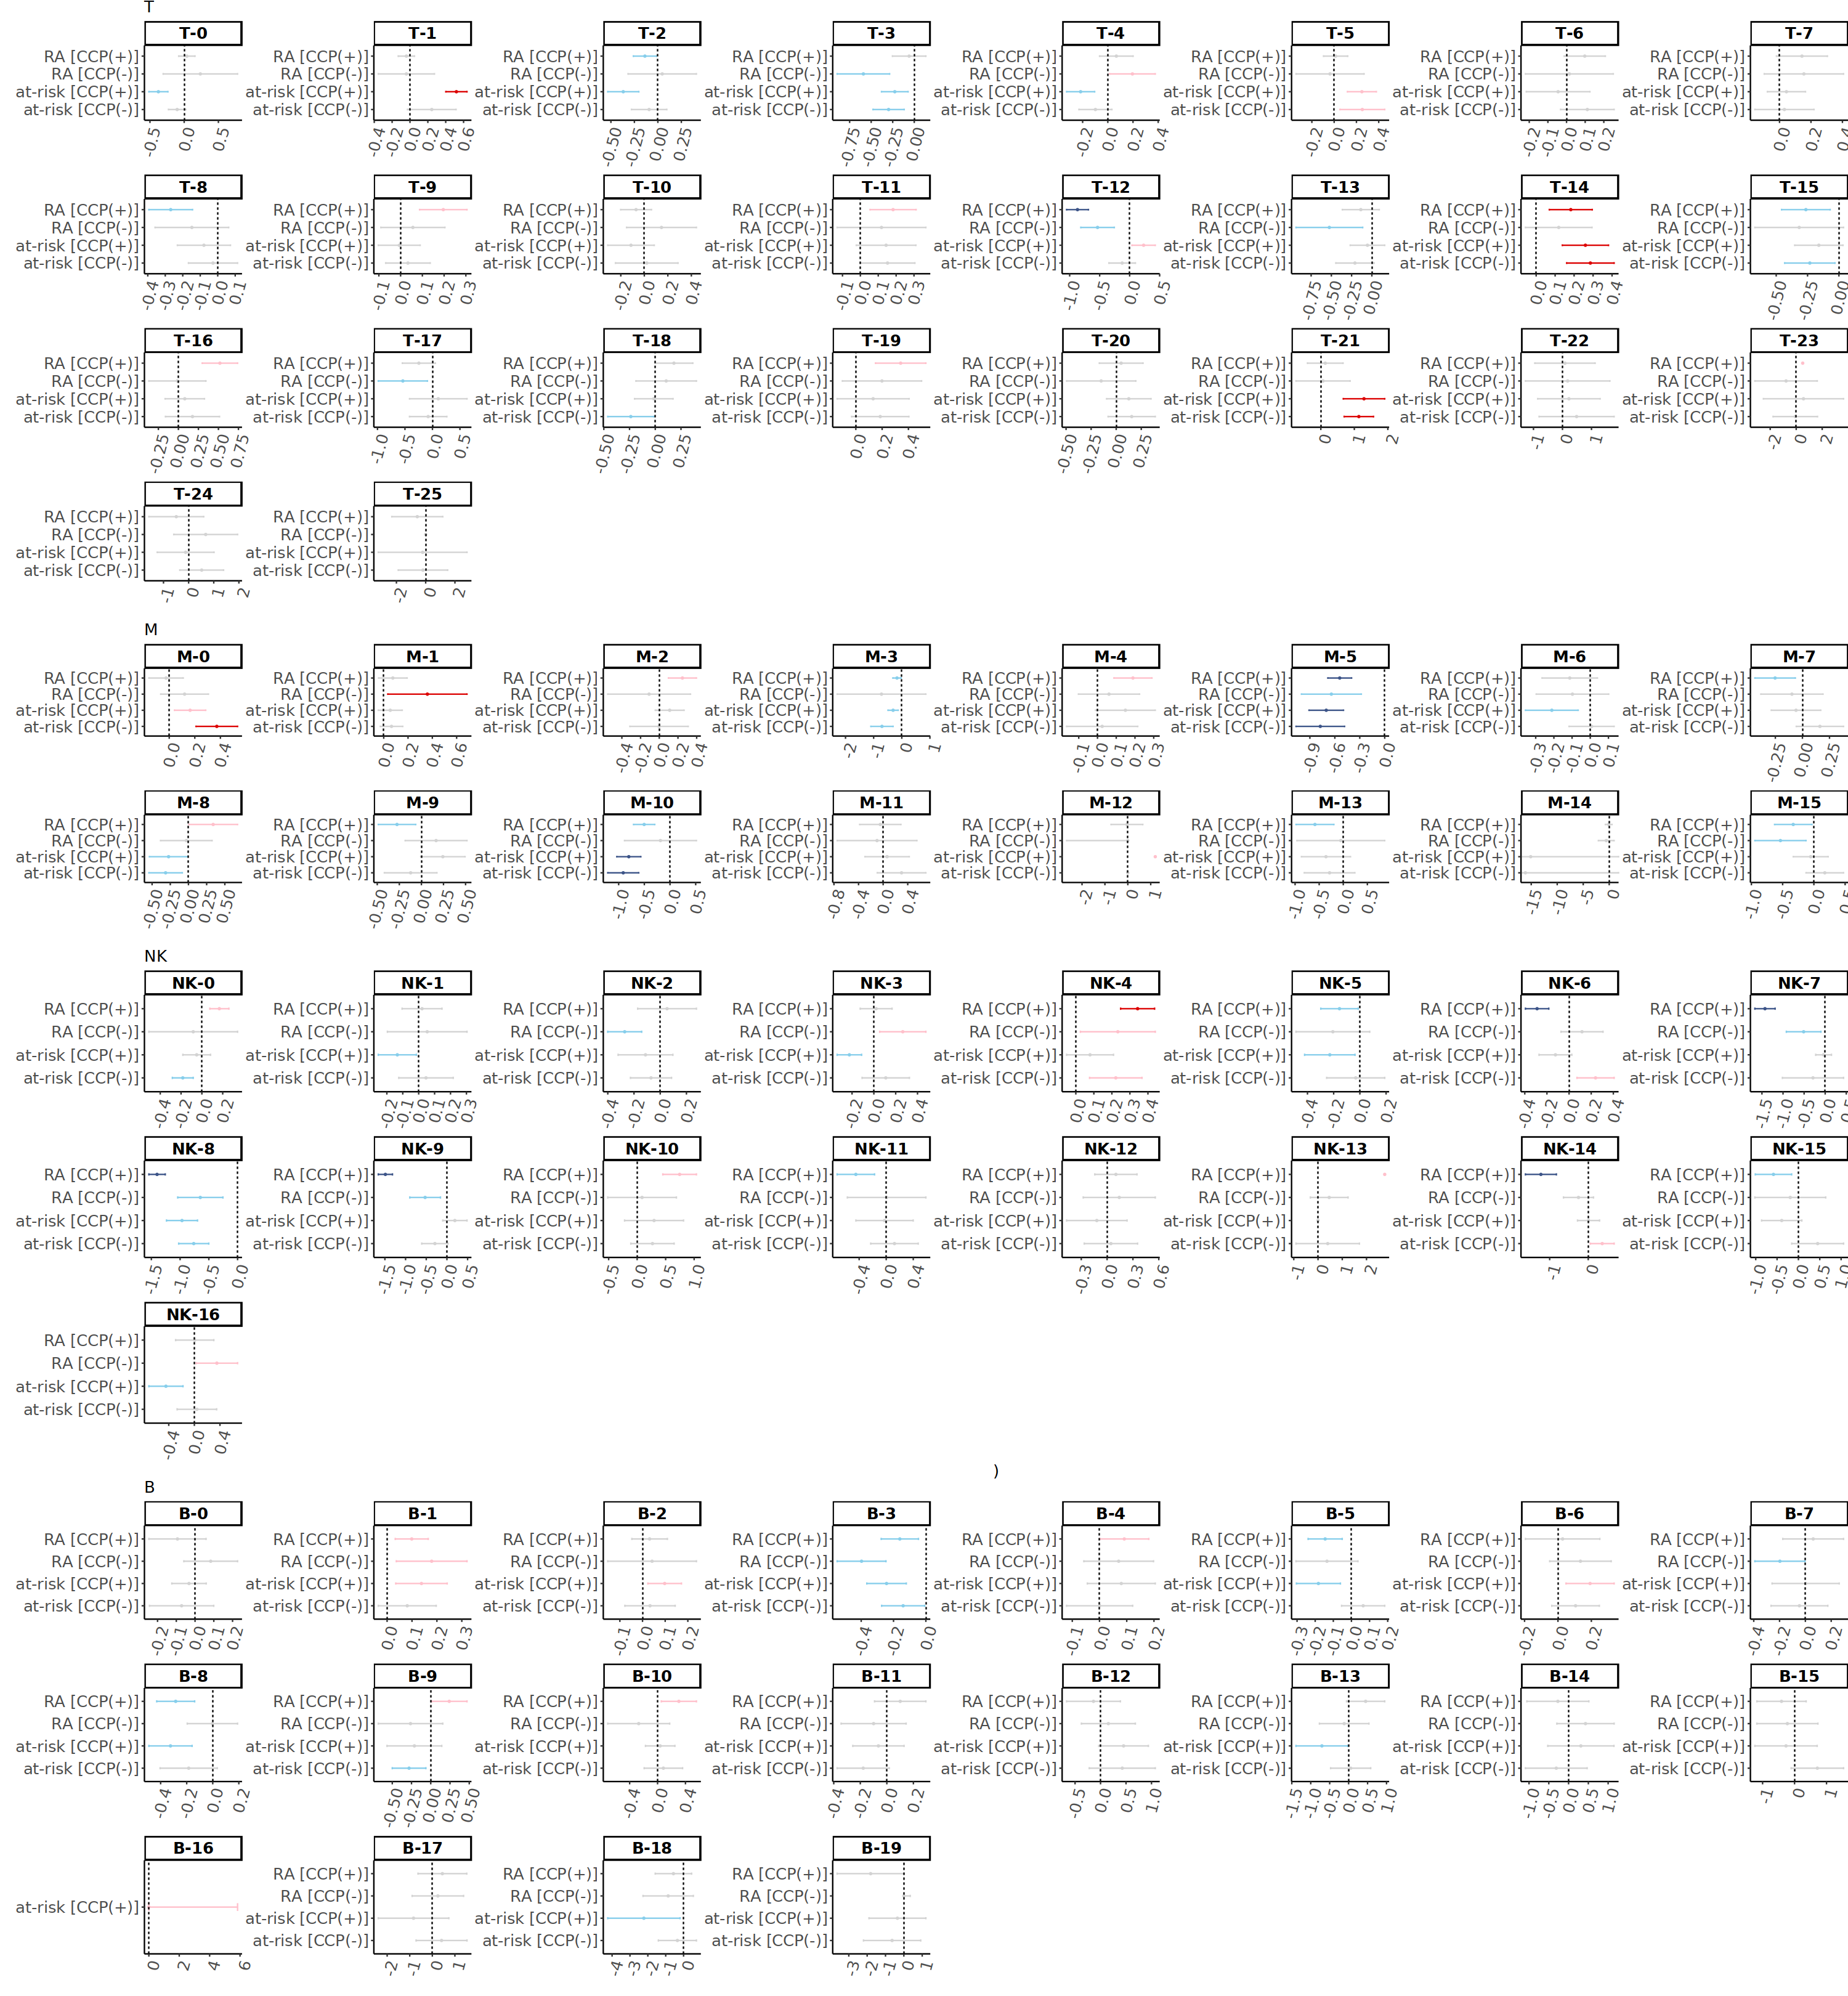

In [3]:
ord = c("at-risk [CCP(-)]","at-risk [CCP(+)]","RA [CCP(-)]","RA [CCP(+)]")

g_t = masc %>%
  dplyr::group_by(cell) %>%
  dplyr::mutate(FDR = qvalue::qvalue(model.pvalue)$qvalues) %>%
  dplyr::mutate(comp = factor(comp,levels=ord),
                col = dplyr::case_when(
                  CIupper < 1 & FDR < 0.05 ~ '#3C5488FF',
                  CIupper < 1 & FDR > 0.05 ~ 'skyblue',
                  CIlower > 1 & FDR < 0.05 ~ '#DC0000FF',
                  CIlower > 1 & FDR > 0.05 ~ 'pink',  
                  TRUE ~ "lightgray"),
                CIupper = ifelse(CIupper>100 & model.pvalue>0.05, 1, CIupper),
                CIlower = ifelse(CIlower<0.01 & model.pvalue>0.05, 1, CIlower),
                OR = ifelse(CIupper==1|CIlower==1,1,OR)) %>%
  dplyr::mutate(cluster_id = paste(gsub("cluster","",cluster),gsub("_cells","",cell),sep="_")) %>%
  merge(.,cluster_df %>% dplyr::mutate(cluster_id = paste(cluster,ifelse(cell=="M","myeloid",cell),sep="_")),by="cluster_id") %>%
  dplyr::filter(cell.y=="T") %>%
  dplyr::mutate(cluster_id = paste0(cell.y,"-",cluster.y),
                cluster_id = factor(cluster_id, levels = paste0("T-",0:max(as.integer(cluster.y))))) %>%
  na.omit() %>%
  ggplot(., aes(y=comp, x=log(OR), colour=col)) + 
  geom_point(position=position_dodge(width=0.3), size=0.5) +
  geom_errorbarh(aes(xmin=log(CIlower), xmax=log(CIupper)), position = position_dodge(0.3), height=0.1) +
  scale_color_manual(values = c('#3C5488FF' = '#3C5488FF', 'skyblue' = 'skyblue','#DC0000FF' = '#DC0000FF', 'pink' = 'pink', "lightgray" = "lightgray")) + 
  geom_vline(xintercept=0, linetype='dashed', color='black') +
  theme_classic() +
  # coord_flip() +
  facet_wrap( ~ cluster_id, ncol = 8, scale = "free") +
  theme(strip.text.x=element_text(size=15, color="black", face="bold"),
        strip.text.y=element_text(size=15, color="black", face="bold"),
        legend.position = "none",
        plot.title = element_text(size=15),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size =15),
        axis.text.y = element_text(size = 15),
        axis.text.x = element_text(size = 15, angle=75, hjust=1),
        legend.text =  element_text(size = 15),
        legend.key.size = grid::unit(0.5, "lines"),
        legend.title = element_text(size = 0.8, hjust = 0)) +
  labs(title = "T",
       y = "",
       x = "")
g_m = masc %>%
  dplyr::group_by(cell) %>%
  dplyr::mutate(FDR = qvalue::qvalue(model.pvalue)$qvalues) %>%
  dplyr::mutate(comp = factor(comp,levels=ord),
                col = dplyr::case_when(
                  CIupper < 1 & FDR < 0.05 ~ '#3C5488FF',
                  CIupper < 1 & FDR > 0.05 ~ 'skyblue',
                  CIlower > 1 & FDR < 0.05 ~ '#DC0000FF',
                  CIlower > 1 & FDR > 0.05 ~ 'pink',   
                  TRUE ~ "lightgray"),
                CIupper = ifelse(CIupper>100 & model.pvalue>0.05, 1, CIupper),
                CIlower = ifelse(CIlower<0.01 & model.pvalue>0.05, 1, CIlower),
                OR = ifelse(CIupper==1|CIlower==1,1,OR)) %>%
  dplyr::mutate(cluster_id = paste(gsub("cluster","",cluster),gsub("_cells","",cell),sep="_")) %>%
  merge(.,cluster_df %>% dplyr::mutate(cluster_id = paste(cluster,ifelse(cell=="M","myeloid",cell),sep="_")),by="cluster_id") %>%
  dplyr::filter(cell.y=="M") %>%
  dplyr::mutate(cluster_id = paste0(cell.y,"-",cluster.y),
                cluster_id = factor(cluster_id, levels = paste0("M-",0:max(as.integer(cluster.y)))))  %>%
  na.omit() %>%
  ggplot(., aes(y=comp, x=log(OR), colour=col)) + 
  geom_point(position=position_dodge(width=0.3), size=0.5) +
  geom_errorbarh(aes(xmin=log(CIlower), xmax=log(CIupper)), position = position_dodge(0.3), height=0.1) +
  scale_color_manual(values = c('#3C5488FF' = '#3C5488FF', 'skyblue' = 'skyblue','#DC0000FF' = '#DC0000FF', 'pink' = 'pink', "lightgray" = "lightgray")) + 
  geom_vline(xintercept=0, linetype='dashed', color='black') +
  theme_classic() +
  # coord_flip() +
  facet_wrap( ~ cluster_id, ncol = 8, scale = "free") +
  theme(strip.text.x=element_text(size=15, color="black", face="bold"),
        strip.text.y=element_text(size=15, color="black", face="bold"),
        legend.position = "none",
        plot.title = element_text(size=15),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size =15),
        axis.text.y = element_text(size = 15),
        axis.text.x = element_text(size = 15, angle=75, hjust=1),
        legend.text =  element_text(size = 15),
        legend.key.size = grid::unit(0.5, "lines"),
        legend.title = element_text(size = 0.8, hjust = 0)) +
  labs(title = "M",
       y = "",
       x = "")
g_n = masc %>%
  dplyr::group_by(cell) %>%
  dplyr::mutate(FDR = qvalue::qvalue(model.pvalue)$qvalues) %>%
  dplyr::mutate(comp = factor(comp,levels=ord),
                col = dplyr::case_when(
                  CIupper < 1 & FDR < 0.05 ~ '#3C5488FF',
                  CIupper < 1 & FDR > 0.05 ~ 'skyblue',
                  CIlower > 1 & FDR < 0.05 ~ '#DC0000FF',
                  CIlower > 1 & FDR > 0.05 ~ 'pink',  
                  TRUE ~ "lightgray"),
                CIupper = ifelse(CIupper>100 & model.pvalue>0.05, 1, CIupper),
                CIlower = ifelse(CIlower<0.01 & model.pvalue>0.05, 1, CIlower),
                OR = ifelse(CIupper==1|CIlower==1,1,OR)) %>%
  dplyr::mutate(cluster_id = paste(gsub("cluster","",cluster),gsub("_cells","",cell),sep="_")) %>%
  merge(.,cluster_df %>% dplyr::mutate(cluster_id = paste(cluster,ifelse(cell=="M","myeloid",cell),sep="_")),by="cluster_id") %>%
  dplyr::filter(cell.y=="NK") %>%
  dplyr::mutate(cluster_id = paste0(cell.y,"-",cluster.y),
                cluster_id = factor(cluster_id, levels = paste0("NK-",0:max(as.integer(cluster.y))))) %>%
  na.omit() %>%
  ggplot(., aes(y=comp, x=log(OR), colour=col)) + 
  geom_point(position=position_dodge(width=0.3), size=0.5) +
  geom_errorbarh(aes(xmin=log(CIlower), xmax=log(CIupper)), position = position_dodge(0.3), height=0.1) +
  scale_color_manual(values = c('#3C5488FF' = '#3C5488FF', 'skyblue' = 'skyblue','#DC0000FF' = '#DC0000FF', 'pink' = 'pink', "lightgray" = "lightgray")) + 
  geom_vline(xintercept=0, linetype='dashed', color='black') +
  theme_classic() +
  # coord_flip() +
  facet_wrap( ~ cluster_id, ncol = 8, scale = "free") +
  theme(strip.text.x=element_text(size=15, color="black", face="bold"),
        strip.text.y=element_text(size=15, color="black", face="bold"),
        legend.position = "none",
        plot.title = element_text(size=15),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size =15),
        axis.text.y = element_text(size = 15),
        axis.text.x = element_text(size = 15, angle=75, hjust=1),
        legend.text =  element_text(size = 15),
        legend.key.size = grid::unit(0.5, "lines"),
        legend.title = element_text(size = 0.8, hjust = 0)) +
  labs(title = "NK",
       y = "",
       x = ")")
g_b = masc %>%
  dplyr::group_by(cell) %>%
  dplyr::mutate(FDR = qvalue::qvalue(model.pvalue)$qvalues) %>%
  dplyr::mutate(comp = factor(comp,levels=ord),
                col = dplyr::case_when(
                  CIupper < 1 & FDR < 0.05 ~ '#3C5488FF',
                  CIupper < 1 & FDR > 0.05 ~ 'skyblue',
                  CIlower > 1 & FDR < 0.05 ~ '#DC0000FF',
                  CIlower > 1 & FDR > 0.05 ~ 'pink',  
                  TRUE ~ "lightgray"),
                CIupper = ifelse(CIupper>100 & model.pvalue>0.05, 1, CIupper),
                CIlower = ifelse(CIlower<0.01 & model.pvalue>0.05, 1, CIlower),
                OR = ifelse(CIupper==1|CIlower==1,1,OR)) %>%
  dplyr::mutate(cluster_id = paste(gsub("cluster","",cluster),gsub("_cells","",cell),sep="_")) %>%
  merge(.,cluster_df %>% dplyr::mutate(cluster_id = paste(cluster,ifelse(cell=="M","myeloid",cell),sep="_")),by="cluster_id") %>%
  dplyr::filter(cell.y=="B") %>%
  dplyr::mutate(cluster_id = paste0(cell.y,"-",cluster.y),
                cluster_id = factor(cluster_id, levels = paste0("B-",0:max(as.integer(cluster.y))))) %>%
  na.omit() %>%
  ggplot(., aes(y=comp, x=log(OR), colour=col)) + 
  geom_point(position=position_dodge(width=0.3), size=0.5) +
  geom_errorbarh(aes(xmin=log(CIlower), xmax=log(CIupper)), position = position_dodge(0.3), height=0.1) +
  scale_color_manual(values = c('#3C5488FF' = '#3C5488FF', 'skyblue' = 'skyblue','#DC0000FF' = '#DC0000FF', 'pink' = 'pink', "lightgray" = "lightgray")) + 
  geom_vline(xintercept=0, linetype='dashed', color='black') +
  theme_classic() +
  # coord_flip() +
  facet_wrap( ~ cluster_id, ncol = 8, scale = "free") +
  theme(strip.text.x=element_text(size=15, color="black", face="bold"),
        strip.text.y=element_text(size=15, color="black", face="bold"),
        legend.position = "none",
        plot.title = element_text(size=15),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size =15),
        axis.text.y = element_text(size = 15),
        axis.text.x = element_text(size = 15, angle=75, hjust=1),
        legend.text =  element_text(size = 15),
        legend.key.size = grid::unit(0.5, "lines"),
        legend.title = element_text(size = 0.8, hjust = 0)) +
  labs(title = "B",
       y = "",
       x = "")

options(repr.plot.height = 27, repr.plot.width = 25)
plot(((g_t/g_m/g_n/g_b) + 
        plot_layout(height = c(5,2,4,4))& theme(plot.margin = unit(c(0,0,0,0), "cm"))))


Warning message in `[<-.factor`(`*tmp*`, list, value = 0):
“invalid factor level, NA generated”
Warning message in `[<-.factor`(`*tmp*`, list, value = 0):
“invalid factor level, NA generated”


,cluster_id,cluster.x,size,model.pvalue,OR,CIlower,CIupper,comp,cell.x,col,cell.y,cluster.y,clu_name,logOR,FDR,NegLogFDR,shape
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2,B-0,cluster0,138202,0.4088798,0.9307601,0.7842557,1.104633,at-risk [CCP(-)],B_cells,lightgray,B,0,Naive,0.0000000,0.6010250,0.0,21
4,B-0,cluster0,157856,0.7043966,0.9682838,0.8835207,1.061179,at-risk [CCP(+)],B_cells,lightgray,B,0,Naive,0.0000000,0.7101706,0.0,21
7,B-0,cluster0,176418,0.2127343,0.9104672,0.7816670,1.060490,RA [CCP(+)],B_cells,lightgray,B,0,Naive,0.0000000,0.4789169,0.0,21
8,B-0,cluster0,131997,0.4005826,1.0870930,0.9420111,1.254519,RA [CCP(-)],B_cells,lightgray,B,0,Naive,0.0000000,0.6010250,0.0,21
12,NK-0,cluster0,236192,0.7869291,0.9511902,0.8327316,1.086500,at-risk [CCP(+)],NK_cells,lightgray,NK,0,CD56dimCD16+CD2+CD57+,0.0000000,0.7505507,0.0,21
14,NK-0,cluster0,298319,0.1987879,1.1825402,1.0792026,1.295773,RA [CCP(+)],NK_cells,#DC0000FF,NK,0,CD56dimCD16+CD2+CD57+,0.1676649,0.4754460,0.5,21


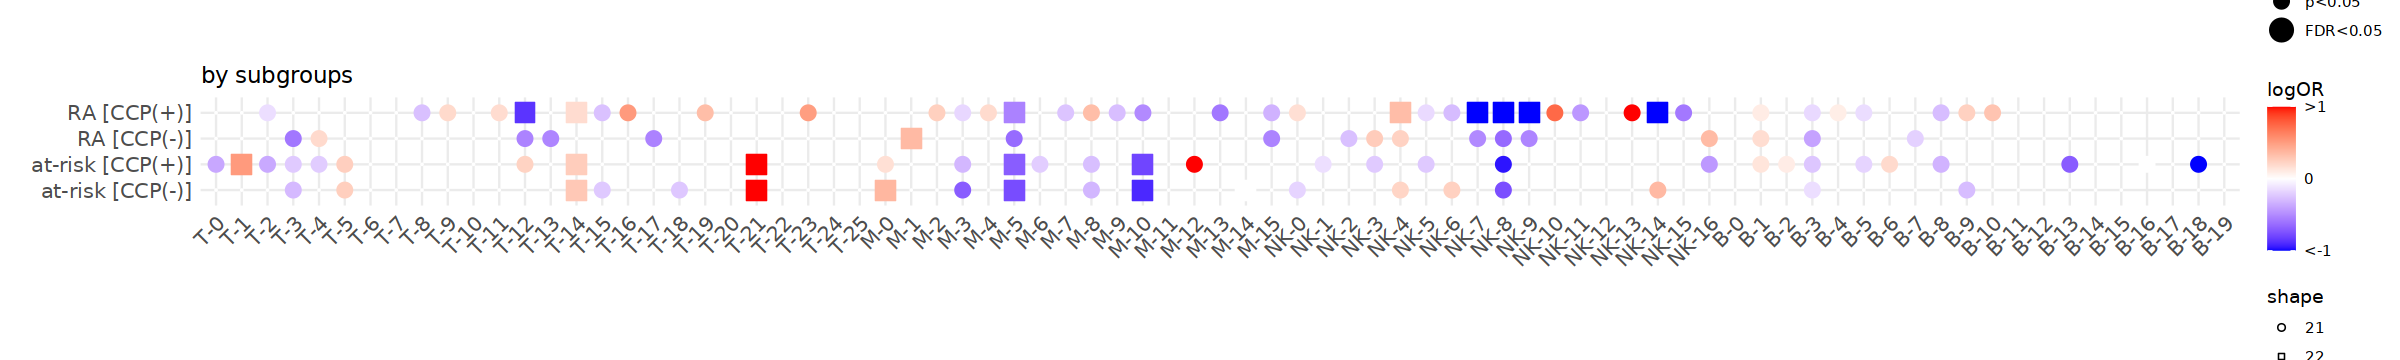

In [4]:


options(repr.plot.height = 3, repr.plot.width = 20)

mat = masc %>%
  dplyr::mutate(comp = factor(comp,levels=ord),
                col = dplyr::case_when(
                  CIupper < 1 ~ '#3C5488FF',
                  CIlower > 1 ~ '#DC0000FF',
                  TRUE ~ "lightgray"),
                CIupper = ifelse(CIupper>100 & model.pvalue>0.05, 1, CIupper),
                CIlower = ifelse(CIlower<0.01 & model.pvalue>0.05, 1, CIlower),
                OR = ifelse(CIupper==1|CIlower==1,1,OR)) %>%
  dplyr::mutate(cluster_id = paste(gsub("cluster","",cluster),gsub("_cells","",cell),sep="_")) %>%
  merge(.,cluster_df %>% dplyr::mutate(cluster_id = paste(cluster,ifelse(cell=="M","myeloid",cell),sep="_")),by="cluster_id") %>%
  dplyr::mutate(cluster_id = paste0(cell.y,"-",cluster.y),
                cluster_id = factor(cluster_id, levels = c(t(outer(c("T-","M-","NK-","B-"), seq(0,max(as.integer(gsub("cluster","",masc$cluster))),1), FUN = "paste0")))),
                comp = factor(comp,levels = ord),
                logOR = log(OR),
                logOR = dplyr::case_when(
                  logOR > 1 ~ 1,
                  logOR < -1 ~ -1, 
                  TRUE ~ logOR)) %>%
  na.omit()
mat$FDR = qvalue::qvalue(mat$model.pval)$qvalues # FDR by all clusters 
mat$NegLogFDR = -log10(qvalue::qvalue(mat$model.pval)$qvalues)
mat$NegLogFDR = dplyr::case_when(
      mat$FDR > 0.05 & mat$col != "lightgray" ~ 0.5,  # CI doesn't include 1 but FDR>0.05
      mat$FDR > 0.05 & mat$col == "lightgray" ~ 0,    # CI include 1 but FDR>0.05
      mat$FDR < 0.05 ~ 1.3)
mat$col = dplyr::case_when(
      mat$logOR == 0 | mat$NegLogFDR == 0 ~ "lightgray", 
      TRUE ~ mat$col)
mat$logOR = dplyr::case_when(
      mat$col == "lightgray" ~ 0, 
      TRUE ~ mat$logOR)
mat %<>%
  dplyr::mutate_all(~replace(., is.na(.), 0)) %>%
  dplyr::mutate(shape = ifelse(FDR < 0.05, "22", "21"))
head(mat)
ggplot(
  data = mat,
  aes(x = cluster_id, y = comp, fill = logOR, color = logOR, size = NegLogFDR)
) +
  ggplot2::geom_point(
    aes(color = logOR, size = NegLogFDR, shape = shape),
    
  ) +
  scale_size_area(breaks = c(0, 0.5, 1.3), labels = c("p>0.05","p<0.05","FDR<0.05")) + 
  scale_shape_manual(values=c("22" = 22, "21" = 21)) +
  theme_minimal() +
  scale_fill_gradient2(limit = c(-1,1), breaks = c(-1,0,1), low = "blue", high =  "red", mid = "white", midpoint = 0, labels = c("<-1","0",">1")) +
  scale_color_gradient2(limit = c(-1,1), breaks = c(-1,0,1), low = "blue", high =  "red", mid = "white", midpoint = 0, labels = c("<-1","0",">1")) +
  theme(
    axis.text.x = ggplot2::element_text(
      angle = 45,
      vjust = 1,
      size = 12,
      hjust = 1
    ),
    axis.text.y = element_text(size = 12)
  ) +
  coord_fixed() +
  labs(title = "by subgroups",
       y = "",
       x = "")


Warning message:
“The input is a data frame, convert it to a matrix.”
Warning message:
“The heatmap has not been initialized. You might have different results
if you repeatedly execute this function, e.g. when row_km/column_km was
set. It is more suggested to do as `ht = draw(ht); column_order(ht)`.”


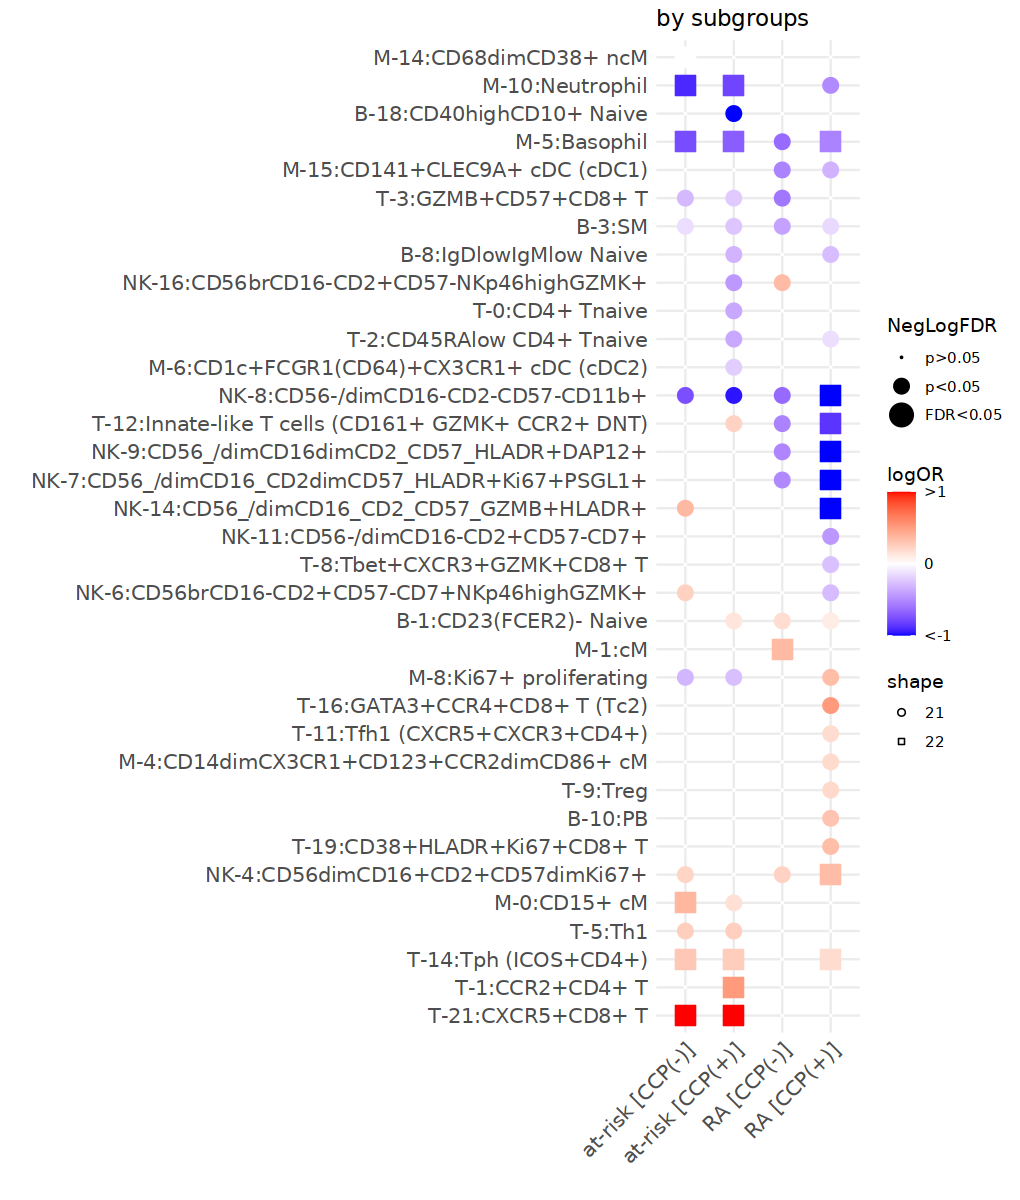

In [5]:
sig_clusters = mat %>%
    dplyr::filter(model.pvalue<0.05) %>%
    .$cluster_id %>% as.character() %>% unique()
tmp = mat %>%
    dplyr::mutate(OR = ifelse(model.pvalue<0.05, OR, 1)) %>%
    .[,c("cluster_id","comp","OR")] %>%
    pivot_wider(names_from = cluster_id, values_from = OR) %>%
    tibble::column_to_rownames("comp")
ord = colnames(tmp)[column_order(Heatmap(tmp))]
ord = ord[ord %in% sig_clusters]
ord_name = mat[mat$cluster_id %in% ord,] %>%
    dplyr::mutate(cluster_id = factor(as.character(cluster_id),levels=ord),
                 clu_name = paste0(cluster_id,":",clu_name)) %>%
    dplyr::arrange(cluster_id) %>%
    .$clu_name %>% unique()
options(repr.plot.height = 10, repr.plot.width = 8.5)
ggplot(
  data = mat[mat$cluster_id %in% ord,] %>%
    dplyr::mutate(cluster_id = factor(as.character(cluster_id),levels=ord),
                 clu_name = paste0(cluster_id,":",clu_name),
                 clu_name = factor(clu_name,levels=ord_name)),
  aes(x = clu_name, y = comp, fill = logOR, color = logOR, size = NegLogFDR)
) +
  ggplot2::geom_point(
    aes(color = logOR, size = NegLogFDR, shape = shape),
    
  ) +
  scale_size_area(breaks = c(0, 0.5, 1.3), labels = c("p>0.05","p<0.05","FDR<0.05")) + 
  scale_shape_manual(values=c("22" = 22, "21" = 21)) +
  theme_minimal() +
  scale_fill_gradient2(limit = c(-1,1), breaks = c(-1,0,1), low = "blue", high =  "red", mid = "white", midpoint = 0, labels = c("<-1","0",">1")) +
  scale_color_gradient2(limit = c(-1,1), breaks = c(-1,0,1), low = "blue", high =  "red", mid = "white", midpoint = 0, labels = c("<-1","0",">1")) +
  theme(
    axis.text.x = ggplot2::element_text(
      angle = 45,
      vjust = 1,
      size = 12,
      hjust = 1
    ),
    axis.text.y = element_text(size = 12)
  ) +
  coord_flip() +
  labs(title = "by subgroups",
       y = "",
       x = "")


In [6]:

# set parameters
n_min = 10000
frac = 0.90

for (CELL in c("B_cells","NK_cells","T_cells","myeloid")){
  
  print(CELL)
  # parameter for UMAP
    if (CELL == "B_cells"){  
        prop = 1
        n_neighbors=30
        min_dist=0.01
        resolution_list=0.5
    } else if (CELL == "T_cells"){  
        prop = 0.1
        n_neighbors=30
        min_dist=0.01
        resolution_list=0.7
    } else if (CELL == "NK_cells"){  
        prop = 1
        n_neighbors=30
        min_dist=0.01
        resolution_list=0.3
    } else if (CELL == "myeloid"){    
        prop = 0.1
        n_neighbors=30
        min_dist=0.01
        resolution_list=0.3
    }
    
  umap_res <- readRDS(file=paste0("/projects/jinamo@xsede.org/cytof/data/",CELL,"/umap_Prop",prop,"_Nmin",n_min,"_topVar",frac,"_nneighbors",n_neighbors,"_mindist",min_dist,"_res",resolution_list,".rds"))
  # remove clusters less than cut off
  min_cell_cluster = 30
  clu = umap_res %>%
    dplyr::group_by(res_cell) %>%
    dplyr::summarize(count = dplyr::n()) %>%
    dplyr::arrange(count) %>%
    dplyr::filter(count > min_cell_cluster) %>%
    .$res_cell %>%
    unique()
  clu_logi = umap_res$res_cell %in% clu
  umap_res = umap_res[clu_logi,]
  tmp = umap_res %>%
    dplyr::group_by(res_cell) %>%
    dplyr::summarize(count = dplyr::n()) %>%
    dplyr::ungroup() %>%
    dplyr::mutate(cell = ifelse(CELL=="myeloid","M",gsub("_cells","",CELL)),
                  cluster_id = paste0(cell,"-",res_cell)) %>%
    dplyr::select(count,cluster_id)
  
  if (CELL == "B_cells"){
    df = tmp
  } else {
    df = rbind(tmp,df)
  }
  
}


[1] "B_cells"
[1] "NK_cells"
[1] "T_cells"
[1] "myeloid"


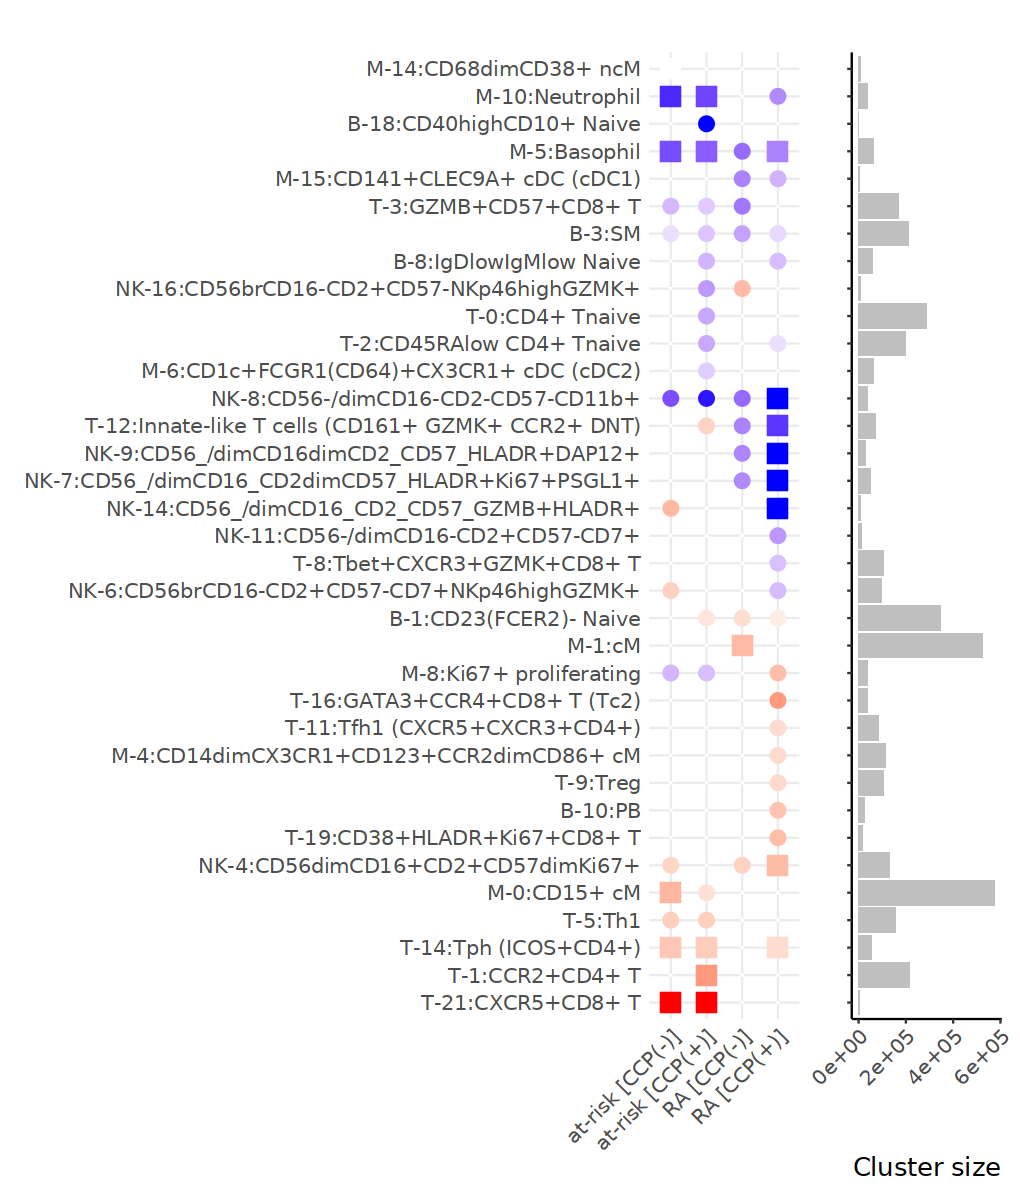

In [7]:

pmain = ggplot(
  data = mat[mat$cluster_id %in% ord,] %>%
    dplyr::mutate(cluster_id = factor(as.character(cluster_id),levels=ord),
                 clu_name = paste0(cluster_id,":",clu_name),
                 clu_name = factor(clu_name,levels=ord_name)),
  aes(x = clu_name, y = comp, fill = logOR, color = logOR, size = NegLogFDR)
) +
  ggplot2::geom_point(
    aes(color = logOR, size = NegLogFDR, shape = shape),
    
  ) +
  scale_size_area(breaks = c(0, 0.5, 1.3), labels = c("p>0.05","p<0.05","FDR<0.05")) + 
  scale_shape_manual(values=c("22" = 22, "21" = 21)) +
  theme_minimal() +
  scale_fill_gradient2(limit = c(-1,1), breaks = c(-1,0,1), low = "blue", high =  "red", mid = "white", midpoint = 0, labels = c("<-1","0",">1")) +
  scale_color_gradient2(limit = c(-1,1), breaks = c(-1,0,1), low = "blue", high =  "red", mid = "white", midpoint = 0, labels = c("<-1","0",">1")) +
  theme(
      legend.position = "none",
    axis.text.x = ggplot2::element_text(
      angle = 45,
      vjust = 1,
      size = 12,
      hjust = 1
    ),
    axis.text.y = element_text(size = 12)
  ) +
  coord_flip() +
  labs(title = "",
       y = "",
       x = "")

xbar <- ggplot()+
  geom_bar(data = mat[mat$cluster_id %in% ord,] %>%
    dplyr::mutate(cluster_id = factor(as.character(cluster_id),levels=ord),
                 clu_name = paste0(cluster_id,":",clu_name)) %>%
    merge(.,df,by="cluster_id") %>%
    dplyr::distinct(cluster_id,count), 
               aes(y = cluster_id, x = count),stat='identity', fill="grey75") +
  theme_classic() +
  theme(strip.text.x=element_text(size=15, color="black", face="bold"),
        strip.text.y=element_text(size=15, color="black", face="bold"),
        legend.position = "none",
        plot.title = element_text(size=15),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size =15),
        axis.text.y = element_blank(),
        axis.text.x = element_text(angle = 45,
      vjust = 1,
      size = 12,
      hjust = 1),
        legend.text =  element_text(size = 15),
        legend.key.size = grid::unit(0.5, "lines"),
        legend.title = element_text(size = 0.8, hjust = 0)) +
  labs(title = "",
       y = "",
       x = "Cluster size")

options(repr.plot.height = 10, repr.plot.width = 8.5)
(pmain+xbar)+plot_layout(widths = c(1,1))
# ggsave("/projects/jinamo@xsede.org/CCPstatus.pdf", width=8.5, height=10, useDingbats = F)